In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

In [2]:
# Read data from CSV file
df = pd.read_csv("C:/Users/trant/OneDrive/Tài liệu/Đồ án Phân tích dữ liệu/DATASET/BID.VN-1.csv")

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

# Select the Close column as the dependent variable
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [4]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

# Split the data into training and test 
train_size = int(0.7 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [5]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

# Find the best ARIMA model using auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4648.172, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4656.029, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4654.172, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4654.171, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4658.002, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4652.172, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.054 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
# Preparing test data
x_test = np.arange(train_size, train_size + test_size).reshape(-1, 1)
y_test = test_data.reshape(-1)
y_pred_test = model.predict(n_periods=len(y_test))

# Evaluate the accuracy of the test set
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_test = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred_test)

print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")
print(f"MSLE on Test dataset: {test_msle}")

MAPE on Test dataset: 0.330503116939887
RMSE on Test dataset: 15366.711727281607
MSLE on Test dataset: 0.19008857460085063


In [7]:
# Predict the closing prices for the next 30, 60, and 90 days
last_index = df_Close.index[-1]

y_next_30_days = model.predict(n_periods=30)
y_next_60_days = model.predict(n_periods=60)
y_next_90_days = model.predict(n_periods=90)

y_next_30_days = scaler.inverse_transform(y_next_30_days.reshape(-1, 1))
y_next_60_days = scaler.inverse_transform(y_next_60_days[:30].reshape(-1, 1)) # Taking only the first 30 days
y_next_90_days = scaler.inverse_transform(y_next_90_days[:30].reshape(-1, 1)) # Taking only the first 30 days

# Print the predicted closing prices
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days.flatten())

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days.flatten())

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days.flatten())

# Calculate accuracy metrics for the next 30, 60, and 90 days predictions
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    msle = mean_squared_log_error(y_true, y_pred)
    return mape, rmse, msle

Predicted closing prices for the next 30 days:
[27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125
 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125
 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125
 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125
 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125]
Predicted closing prices for the next 60 days:
[27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125
 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125
 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125
 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125
 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125]
Predicted closing prices for the next 90 days:
[27021.03125 27021.03125 27021.03125 27021.03125 27021.03125 27021.03125
 27021.03125 27021.03125 27021.03125 27021.03125 27021

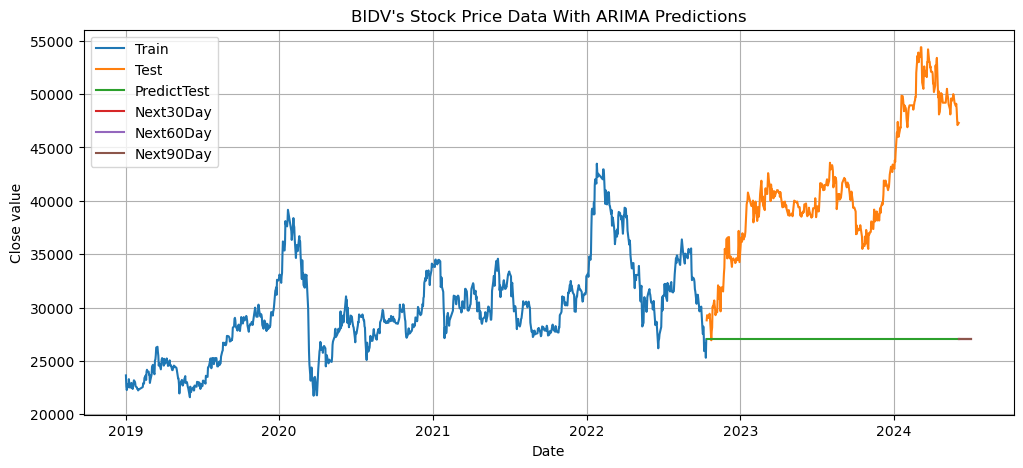

In [8]:
# Create a list of indices starting from the next date for 30, 60, and 90 days
last_date = df.index[-1]
next_date = last_date + pd.DateOffset(days=1)

index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

# Drawing
plt.figure(figsize=(12, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(train_data.reshape(-1, 1)), label='Train')
plt.plot(df.index[train_size:], y_test, label='Test')
plt.plot(df.index[train_size:], y_pred_test, label='PredictTest')
plt.plot(index_next_30_days, y_next_30_days, label='Next30Day')
plt.plot(index_next_60_days[:30], y_next_60_days, label='Next60Day') # Taking only the first 30 days
plt.plot(index_next_90_days[:30], y_next_90_days, label='Next90Day') # Taking only the first 30 days

plt.legend()
plt.grid()
plt.title(f"BIDV's Stock Price Data With ARIMA Predictions")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.show()
